In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import HTML
from IPython.display import display
%matplotlib inline
sns.set_style("whitegrid")

# Reading simulation results

In [27]:
df = pd.read_csv('d:\\Src\\health-des\\logs\\sim-res-2017-02-17-15-49-28.csv')
df.head()

,Unnamed: 0,STATE,QUEUE_TIME,DIRECTION,QUEUE_LENGTH,PAT_CLASS,ID,TIME
0,0,_,0,IN,0,0,0,37
1,1,_,0,OUT,0,0,0,37
2,2,A,0,IN,0,0,0,37
3,3,_,0,IN,0,0,1,43
4,4,_,0,OUT,0,0,1,43


In [28]:
df = df[df.ID >= 0]
ids = list(df.ID.unique())
len(ids)

889

# Reading observations

In [29]:
obs = pd.read_csv('d:\\Src\\health-des\\data\\acs\\LoS for clusters.csv', sep=';')
obs['Cluster'] = obs['Cluster'] - 1
obs.head()

,Cluster,Case,LoS
0,0,10004_S2015,17863.0
1,0,10145_S2010,21915.0
2,0,10266_S2011,23055.0
3,0,1083_S2015,11732.0
4,0,10983_S2014 11759_S2014,4773.0


# PDFs

Plotting PDFs for LoS in datasets. First, total LoS for simulation.

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


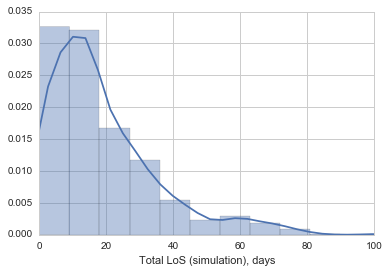

In [30]:
los = np.array(df.groupby('ID')['TIME'].max() - df.groupby('ID')['TIME'].min(), dtype=int)
los = los / (60.0 * 24.0)
sns.distplot(los)
plt.xlim((0,100))
plt.xlabel('Total LoS (simulation), days')

Total LoS for observations

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


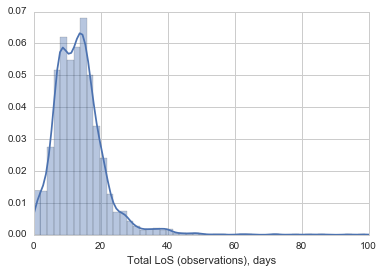

In [31]:
los_obs = obs.LoS / (60.0 * 24.0)
sns.distplot(los_obs[los_obs < 100])
plt.xlim((0,100))
plt.xlabel('Total LoS (observations), days')

Total LoS from conclusion in EHR.

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


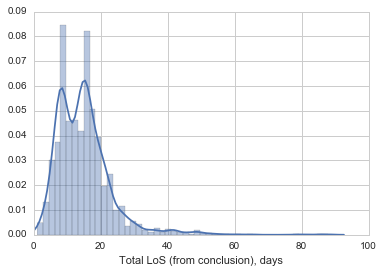

In [32]:
los_1 = np.loadtxt('d:\\Src\\health-des\\data\\acs\\los.txt').flatten()
los_1 = los_1[los_1 < 100]
sns.distplot(los_1)
plt.xlim((0,100))
plt.xlabel('Total LoS (from conclusion), days')

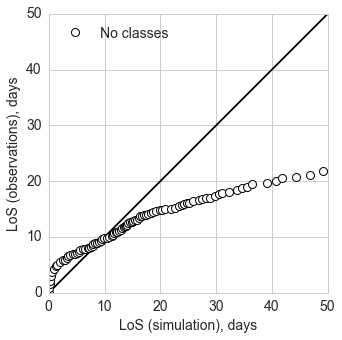

In [40]:
pp = np.arange(0,101)
lims = (0,50)
plt.figure(figsize=(5,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(lims, lims, 'k-')
los_sim = np.array(df.groupby('ID')['TIME'].max() - df.groupby('ID')['TIME'].min()) / (60.0*24.0)
los_obs = np.array(obs['LoS']) / (60.0*24.0)
plt.plot(np.percentile(los_sim, pp), np.percentile(los_obs, pp), 'ow', mec='black', mew=1, markersize=8, label='No classes')
plt.xlim((0, 50))
plt.ylim((0, 50))
plt.xlabel('LoS (simulation), days', fontsize=14)
plt.ylabel('LoS (observations), days', fontsize=14)
plt.gca().set_aspect('equal')
plt.legend(loc=2, fontsize=14)

In [39]:
np.savetxt('d:\\Src\\health-des\\logs\\sim-res-2017-02-17-15-49-28-los-percentiles.csv', np.percentile(los_sim, pp))